# Final Project Submission

**Student name**: David Boyd

**Student pace**: Self paced

**Scheduled project review date/time**: 3/02/2023 19:00 UK time

**Instructor name**: Abhineet



## Business Objective

A telecommunications company wants to identify the leading factors of why a customer cancels their service. By understanding the factors which most strongly contribute to their churn rate they can set up work streams to help mitigate and reduce this effect over time, which will increase the LTV and overall ROI for the company. 

## Importing packages & EDA

In [44]:
# Packages that I'm using to create the classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression


from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

import warnings
warnings.filterwarnings('ignore') 

In [45]:
# Loads data into a DataFrame for investigation
df = pd.read_csv('data/telco_churn_data.csv')

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [46]:
# Checking what datatypes each column consists of
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [47]:
# Converting target variable into an integer for ease of use later
df['churn'] = df['churn'].astype('int')

In [48]:
#
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [49]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [50]:
# Creating area code into a categorical variable, instead of int as it's more applicable
df['area code'] = df['area code'].astype('str')

In [51]:
df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

Looking at the above we can see that this dataset is imbalanced, therefore in the process to maximise the model performance on unseen data we'll have to utilise a resampling method on the training set.

In [52]:
# observing how many and what different options are available for the categorical features
df_obj_cols = df.select_dtypes(include='object')

for col in df_obj_cols:
    print(f'{col.title()} has the following different values: {df[col].unique()}')
    print(f'There are {df[col].nunique()} options for the {col.title()} feature')
    

State has the following different values: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
There are 51 options for the State feature
Area Code has the following different values: ['415' '408' '510']
There are 3 options for the Area Code feature
Phone Number has the following different values: ['382-4657' '371-7191' '358-1921' ... '328-8230' '364-6381' '400-4344']
There are 3333 options for the Phone Number feature
International Plan has the following different values: ['no' 'yes']
There are 2 options for the International Plan feature
Voice Mail Plan has the following different values: ['yes' 'no']
There are 2 options for the Voice Mail Plan feature


Looking at the above columns, it is clear that while we have been give a phone number, since these are all unique, this isn't going to have any influence over whether a customer has churned or not, therefore the next steps will be to drop this column.

After this, looking at our brief exploratory data above there are a few different steps to complete before the data is ready to be passed into a model. These are:
- One hot encode all of the categorical columns
- Normalize all of the numerical columns
- Account for the class imbalance within the target data by using SMOTE

Once these steps have been completed the data should be ready to pass into our proposed models

## Setting up datasets for model testing

In [53]:
# Removing phone number as it'll lead to overfitting given each number is unique
X = df.drop(columns=['churn', 'phone number'], axis=1)

# Selecting target variable
y = df.churn

In [54]:
# Splitting the data for model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

## Useful Functions
Below I've created a few functions that are useful when it comes to building out the model. The first is focused on adding additional features through feature engineering to enrich the dataset

In [55]:
def additional_churn_features(X):
    
    X['total_calls'] = X['total day calls'] + X['total eve calls'] + X['total night calls'] + X['total intl calls']
    X['total_charges'] = X['total day charge'] + X['total eve charge'] + X['total night charge'] + X['total intl charge']
    X['total_minutes'] = X['total day minutes'] + X['total eve minutes'] + X['total night minutes'] + X['total intl minutes']
    X['pct_intl_calls'] = X['total intl calls'] / X['total_calls']
    X['pct_domestic_calls'] = 1 - X['pct_intl_calls']
    X['pct_intl_minutes'] = X['total intl minutes'] / X['total_minutes']
    X['pct_intl_charges'] = X['total intl charge'] / X['total_charges']
    X['avg_mins_per_call_day'] = X['total day minutes'] / X['total day calls']
    X['avg_mins_per_call_eve'] = X['total eve minutes'] / X['total eve calls']
    X['avg_mins_per_call_night'] = X['total night minutes'] / X['total night calls']
    
    X.fillna(method='bfill', inplace=True)
    
    return X

In [56]:
def preparing_model_pipeline(X, model=DecisionTreeClassifier, grid=None, score='f1', booster=None):
     '''
     This function takes a dataset, a model to instantiate if provided and a grid
     which then creates a sklearn pipeline to perform the following steps:
     - Adding additional features to the dataset
     - OHE all categorical features
     - Scaling all numeric columns
     - performing SMOTE to account for class imbalance
     - Instantiating the model
     
     If grid is provided, it then performs the relevant gridsearch function
     ''' 
      # feature engineering
     feat_eng_transformer = FunctionTransformer(additional_churn_features, validate=False)
    
    # OHE
     cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()
     cat_col_transformer = ColumnTransformer(transformers=[
      ("ohe", OneHotEncoder(handle_unknown='ignore', sparse=True), cat_features)], remainder="passthrough")
    
    
     # SMOTE & StandardScaler
     if booster == None:
         imb_pipe = ImPipeline(steps=[('feat_eng', feat_eng_transformer),
                                ('cat_ohe', cat_col_transformer),
                                ('sscaler', StandardScaler(with_mean=False)),
                                ('smote', SMOTE(random_state=42)),
                                ('model', model(random_state=42))
                                ])
     else:
         imb_pipe = ImPipeline(steps=[('feat_eng', feat_eng_transformer),
                                ('cat_ohe', cat_col_transformer),
                                ('sscaler', StandardScaler(with_mean=False)),
                                ('smote', SMOTE(random_state=42)),
                                ('model', model(random_state=42, booster=booster))
                                ])
    
    
     if grid == None:
        return imb_pipe
    
     else:
        
         stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=42)
        
         gridsearch = GridSearchCV(estimator=imb_pipe, 
                          param_grid=grid, 
                          scoring=score, 
                          cv=stratified_kfold)
        
         return gridsearch


## Set up baseline performance for all models

In the code below we create a dataframe to show what performance looks like across a range of different classifier models at a baseline level, this will allow us to select a few to look at hypertuning using the GridSearchCV method

In [57]:
model_list = [DecisionTreeClassifier, RandomForestClassifier, LogisticRegression, 
               AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier]
model_performance = []
for model in model_list:
    inner_list = []
    inner_list.append(f'{str(model).split(".")[-1][:-2]}')
    
    result = preparing_model_pipeline(X_train, model)
    
    fitted_model = result.fit(X_train, y_train)
    
    recall_train = recall_score(y_train, fitted_model.predict(X_train))
    recall_test = recall_score(y_test, fitted_model.predict(X_test))
    inner_list.append(recall_train)
    inner_list.append(recall_test)

    f1_train = f1_score(y_train, fitted_model.predict(X_train))
    f1_test = f1_score(y_test, fitted_model.predict(X_test))
    inner_list.append(f1_train)
    inner_list.append(f1_test)
    
    model_performance.append(inner_list)
    
    #print(f'This is a {model} model')
    #print(classification_report(y_test, fitted_model.predict(X_test), digits=3))

base_model_df = pd.DataFrame(model_performance, columns= ['model_name', 'recall_train', 'recall_test', 'f1_train', 'f1_test'])

base_model_df

,model_name,recall_train,recall_test,f1_train,f1_test
0,DecisionTreeClassifier,1.000000,0.820690,1.000000,0.725610
1,RandomForestClassifier,1.000000,0.744828,1.000000,0.791209
2,LogisticRegression,0.766272,0.662069,0.516451,0.446512
3,AdaBoostClassifier,0.730769,0.648276,0.704708,0.620462
4,GradientBoostingClassifier,0.875740,0.813793,0.933754,0.877323
5,XGBClassifier,1.000000,0.834483,1.000000,0.886447


Looking at the above, we'll select the following models to tune further:
- DecisionTreeClassifier
- RandomForestClassifier
- XGBClassifier

These will run through a grid search and return both the best parameters for performance metrics, targetting the f1 metric

In [15]:
grid_dt =[{'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 5, 10, 15, 20],
    'model__max_features': [None, 10,  5, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 5]}]

tuned_decision_model = preparing_model_pipeline(X_train, grid=grid_dt)

fitted_tuned_dt = tuned_decision_model.fit(X_train, y_train)

fitted_tuned_dt.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 5,
 'model__max_features': None,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2}

In [16]:
pd.DataFrame(classification_report(y_test, fitted_tuned_dt.predict(X_test), digits=3, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.953462,0.982456,0.967742,855.000
1,0.873950,0.717241,0.787879,145.000
accuracy,0.944000,0.944000,0.944000,0.944
macro avg,0.913706,0.849849,0.877810,1000.000
weighted avg,0.941933,0.944000,0.941662,1000.000


In [17]:
grid_rf ={
    'model__n_estimators': [100, 150],                  
    'model__criterion': ['entropy', 'gini'],       
    'model__max_depth': [3, 7],                 
    'model__max_features': [5, 10, 15],       
    'model__min_samples_split': [10, 20, 50],       
    'model__min_samples_leaf': [1, 2, 4]           
            } 
tuned_rforest_model = preparing_model_pipeline(X_train, model=RandomForestClassifier, grid=grid_rf)

fitted_tuned_rf = tuned_rforest_model.fit(X_train, y_train)

fitted_tuned_rf.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 7,
 'model__max_features': 15,
 'model__min_samples_leaf': 4,
 'model__min_samples_split': 10,
 'model__n_estimators': 100}

In [18]:
pd.DataFrame(classification_report(y_test, fitted_tuned_rf.predict(X_test), digits=3, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.968531,0.971930,0.970228,855.000
1,0.830986,0.813793,0.822300,145.000
accuracy,0.949000,0.949000,0.949000,0.949
macro avg,0.899759,0.892861,0.896264,1000.000
weighted avg,0.948587,0.949000,0.948778,1000.000


In [58]:
grid_xgb = {
    'model__learning_rate': [0.1, 0.2],
    'model__max_depth': [6],
    'model__min_child_weight': [1, 2],
    'model__subsample': [0.5, 0.7],
    'model__n_estimators': [100],
}

tuned_xgboost_model = preparing_model_pipeline(X_train, model=XGBClassifier, grid=grid_xgb, score='recall', booster='gbtree')

tuned_xgboost_model.fit(X_train, y_train)

tuned_xgboost_model.best_params_

{'model__learning_rate': 0.1,
 'model__max_depth': 6,
 'model__min_child_weight': 1,
 'model__n_estimators': 100,
 'model__subsample': 0.7}

In [59]:
pd.DataFrame(classification_report(y_test, tuned_xgboost_model.predict(X_test), digits=3, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.969213,0.994152,0.981524,855.000
1,0.959350,0.813793,0.880597,145.000
accuracy,0.968000,0.968000,0.968000,0.968
macro avg,0.964281,0.903973,0.931061,1000.000
weighted avg,0.967783,0.968000,0.966890,1000.000


Now we've performed the tuning on each model, it appears that the best tradeoff between recall and f1-score is with our XGBoostClassifier model. As a result, below we'll produce a few different plots.

The first will be plotting our AUC-ROC curve
After that we want to plot the confusion matrix on our test dataset

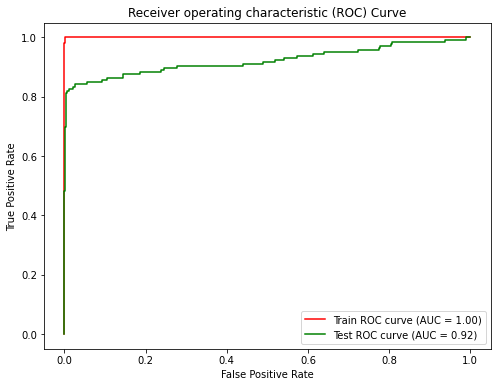

In [60]:
fig, ax2 = plt.subplots(figsize=(8,6))
plot_roc_curve(tuned_xgboost_model, X_train, y_train, ax=ax2, name ='Train ROC curve', color='r')
plot_roc_curve(tuned_xgboost_model, X_test, y_test, ax=ax2, name ='Test ROC curve', color='g')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver operating characteristic (ROC) Curve')
plt.show();

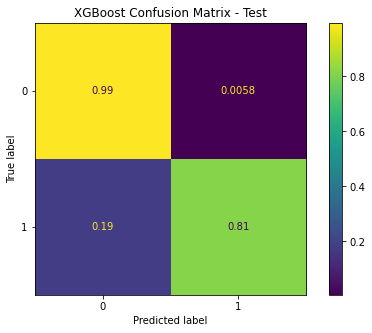

In [61]:
fig, ax = plt.subplots(figsize=(8,5))

plot_confusion_matrix(tuned_xgboost_model, X_test, y_test, ax=ax, normalize='true') 
ax.set_title("XGBoost Confusion Matrix - Test");


Below we look to extract the name of the features which have the highest importance in the selected model, to highlight these back to our stakeholders for areas that need further investigation

In [62]:
# Identifying which features have the highest level of importance

feat_import_array = tuned_xgboost_model.estimator.fit(X_train, y_train).steps[4][1].feature_importances_

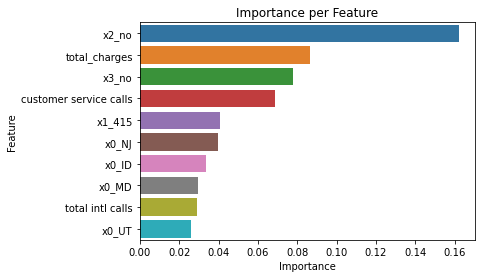

In [67]:
imp_features = pd.DataFrame(pd.Series(feat_import_array, index=X_train_df.columns).sort_values(ascending=False))
imp_features = imp_features.head(10)
imp_features['index'] = imp_features.index
imp_features.head()

ax = sns.barplot(x=imp_features[0], y=imp_features['index'], data=imp_features)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Importance per Feature');

## Code used to preprocess without a pipeline - Need to extract important feature names

The below code is used in the section above to extract the correct column names for feature importance. As we've combined our model into the pipeline, it doesn't currently extract the DataFrame with the preprocessed features for more efficient code.

In [63]:
X_train_cat = X_train.select_dtypes(include='object')

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

X_train_cat_encoded = ohe.fit_transform(X_train_cat)
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded,
                     columns=ohe.get_feature_names(),
                     index=X_train_cat.index)
X_train_cat_encoded_df.shape

(2333, 58)

In [64]:
X_train_cat_encoded_df

,x0_AK,x0_AL,x0_AR,x0_AZ,x0_CA,x0_CO,x0_CT,x0_DC,x0_DE,x0_FL,...,x0_WI,x0_WV,x0_WY,x1_408,x1_415,x1_510,x2_no,x2_yes,x3_no,x3_yes
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [65]:
X_train_clean = X_train.drop(columns=X_train_cat.columns.values, axis=1)
X_train_df = pd.concat([X_train_cat_encoded_df, X_train_clean], axis=1)

X_train_df

,x0_AK,x0_AL,x0_AR,x0_AZ,x0_CA,x0_CO,x0_CT,x0_DC,x0_DE,x0_FL,...,total_calls,total_charges,total_minutes,pct_intl_calls,pct_domestic_calls,pct_intl_minutes,pct_intl_charges,avg_mins_per_call_day,avg_mins_per_call_eve,avg_mins_per_call_night
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,329,57.67,571.3,0.024316,0.975684,0.022930,0.061384,1.172269,2.755238,1.334021
2468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,306,60.01,650.3,0.006536,0.993464,0.006612,0.019330,1.146875,2.975000,2.670000
1844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,296,56.33,599.4,0.010135,0.989865,0.019186,0.055210,1.161538,2.397059,2.804054
3187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,259,70.27,702.2,0.015444,0.984556,0.007690,0.020777,5.297500,3.610526,1.514388
3083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,387,69.77,707.0,0.012920,0.987080,0.017680,0.048445,2.180556,0.995105,2.417557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,312,60.90,560.0,0.019231,0.980769,0.016071,0.039901,2.046296,1.279661,2.237500
2165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,319,61.33,605.9,0.009404,0.990596,0.021456,0.057231,1.662136,2.012397,1.936957
2988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,234,72.22,668.9,0.021368,0.978632,0.017940,0.044863,2.701042,1.806186,6.177778
179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,346,73.36,725.6,0.000000,1.000000,0.000000,0.000000,1.902459,2.609821,1.796429


## Summary & Main results

From the feature importance chart above, we can see the areas that have the biggest influence on customer churn are:
- Not having an international plan in their account
- Not having a voice mail plan in their account
- The total charges per account 
- The number of contacts being made to customer services


To set up a clear list of actions for the company, it is now worth performing a more thorough and in depth EDA around those features to identify what thresholds the business wants to set for their operations teams to try and achieve with the goal of reducing overall customer churn.

After these features, we can also see from the dataset that specific area codes and states have a higher influence than others. While it might be worth investigating this aspect, it is worth having caution what actions can be made around this discovery.